In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf
from tensorflow import keras
from keras import Sequential
from keras.layers import SimpleRNN, LSTM, Dense
from keras.optimizers import SGD

In [35]:
series = yf.Ticker("GC=F")
prices = series.history(start='2019-01-06', end='2024-07-12').Close

Text(0, 0.5, 'Prices')

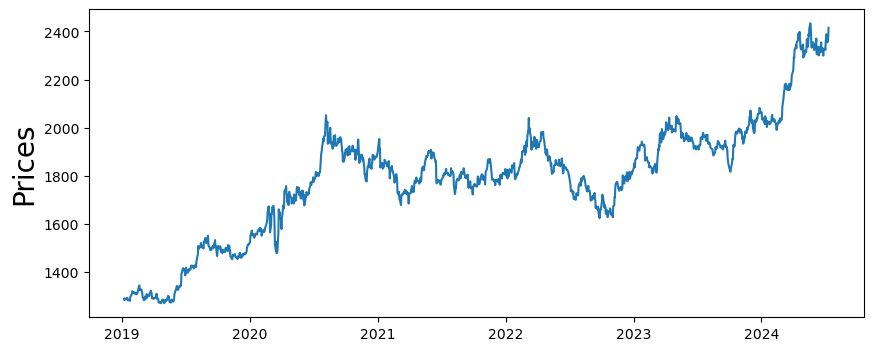

In [36]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

In [37]:
window_size = 5

X_data_train = prices[:'2024-01-01']
X_data_test = prices['2023-12-22':]

data_train = X_data_train.to_numpy()
data_test = X_data_test.to_numpy()

X_train = []
y_train = []
for i in range(len(data_train) - window_size):
    X_train.append(data_train[i: i + window_size])
    y_train.append(data_train[i+window_size])

X_test = []
y_test = []
for i in range(len(data_test) - window_size):
    X_test.append(data_test[i: i + window_size])
    y_test.append(data_test[i+window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [38]:
print(X_data_test)

Date
2023-12-22 00:00:00-05:00    2057.100098
2023-12-26 00:00:00-05:00    2058.199951
2023-12-27 00:00:00-05:00    2081.899902
2023-12-28 00:00:00-05:00    2073.899902
2023-12-29 00:00:00-05:00    2062.399902
                                ...     
2024-07-05 00:00:00-04:00    2388.500000
2024-07-08 00:00:00-04:00    2355.199951
2024-07-09 00:00:00-04:00    2360.100098
2024-07-10 00:00:00-04:00    2372.199951
2024-07-11 00:00:00-04:00    2415.000000
Name: Close, Length: 137, dtype: float64


In [39]:
print(X_test)

[[2057.10009766 2058.19995117 2081.89990234 2073.89990234 2062.39990234]
 [2058.19995117 2081.89990234 2073.89990234 2062.39990234 2064.39990234]
 [2081.89990234 2073.89990234 2062.39990234 2064.39990234 2034.19995117]
 [2073.89990234 2062.39990234 2064.39990234 2034.19995117 2042.30004883]
 [2062.39990234 2064.39990234 2034.19995117 2042.30004883 2042.40002441]
 [2064.39990234 2034.19995117 2042.30004883 2042.40002441 2026.59997559]
 [2034.19995117 2042.30004883 2042.40002441 2026.59997559 2026.40002441]
 [2042.30004883 2042.40002441 2026.59997559 2026.40002441 2021.69995117]
 [2042.40002441 2026.59997559 2026.40002441 2021.69995117 2014.30004883]
 [2026.59997559 2026.40002441 2021.69995117 2014.30004883 2046.69995117]
 [2026.40002441 2021.69995117 2014.30004883 2046.69995117 2026.        ]
 [2021.69995117 2014.30004883 2046.69995117 2026.         2002.59997559]
 [2014.30004883 2046.69995117 2026.         2002.59997559 2018.59997559]
 [2046.69995117 2026.         2002.59997559 2018.59

In [40]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [41]:
print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape,'\n')

print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (1251, 5, 1)
y_train shape =  (1251,) 

X_test shape =  (132, 5, 1)
y_test shape =  (132,)


In [42]:
# model = Sequential()
# model.add(SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
# model.add(SimpleRNN(128, activation='relu', return_sequences=True))
# model.add(SimpleRNN(64, activation='relu', return_sequences=True))
# model.add(SimpleRNN(32, activation='relu'))
# model.add(Dense(1))

# model = Sequential()
# model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(32, activation='relu'))
# model.add(Dense(1))

In [43]:
# model.compile(loss='mse', optimizer='adam')
# model.fit(np.array(X_train), np.array(y_train), epochs=5000, verbose=1)

# model = Sequential()
# model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(32, activation='relu'))
# model.add(Dense(1))

model = Sequential()
model.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
model.add(SimpleRNN(64, activation='relu', return_sequences=True))
model.add(SimpleRNN(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(np.array(X_train), np.array(y_train), epochs=500, batch_size=32, shuffle=True, verbose=1)

Epoch 1/500
40/40 [==============================] - 1s 2ms/step - loss: 283790.2500
Epoch 2/500
40/40 [==============================] - 0s 2ms/step - loss: 2279.1035
Epoch 3/500
40/40 [==============================] - 0s 2ms/step - loss: 849.8614
Epoch 4/500
40/40 [==============================] - 0s 2ms/step - loss: 825.0952
Epoch 5/500
40/40 [==============================] - 0s 2ms/step - loss: 821.9219
Epoch 6/500
40/40 [==============================] - 0s 2ms/step - loss: 813.6871
Epoch 7/500
40/40 [==============================] - 0s 2ms/step - loss: 798.3259
Epoch 8/500
40/40 [==============================] - 0s 2ms/step - loss: 804.5981
Epoch 9/500
40/40 [==============================] - 0s 2ms/step - loss: 813.4138
Epoch 10/500
40/40 [==============================] - 0s 2ms/step - loss: 858.4360
Epoch 11/500
40/40 [==============================] - 0s 2ms/step - loss: 900.4798
Epoch 12/500
40/40 [==============================] - 0s 2ms/step - loss: 940.5640
Epoch 13/

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 64)             4224      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5, 64)             8256      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20801 (81.25 KB)
Trainable params: 20801 (81.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
results = model.predict(np.array(X_test))

5/5 [==============================] - 0s 1ms/step


In [46]:
pred_series = pd.Series(results.flatten(), index=prices['2023-12-22':].index[window_size:window_size + len(results)])

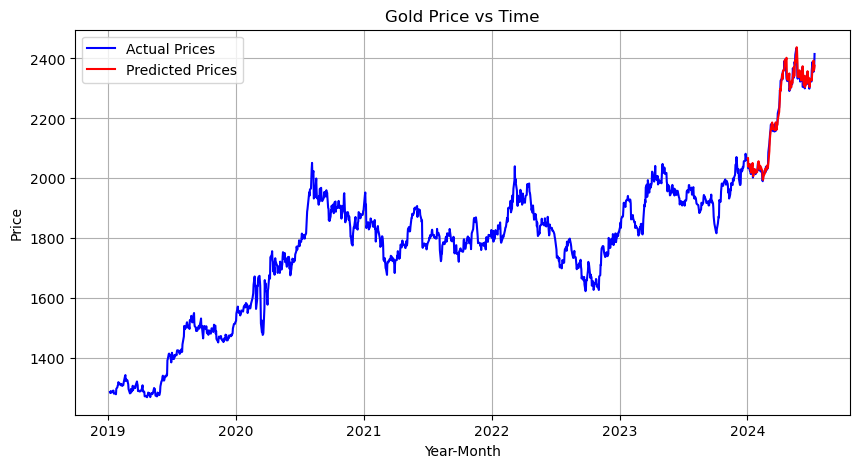

In [47]:
prices_2024 = prices['2024-01-01':]
plt.figure(figsize=(10, 5))
plt.plot(prices, color='blue', label='Actual Prices')
plt.plot(pred_series, color='red', label='Predicted Prices')
plt.legend()
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Gold Price vs Time')
plt.grid(True)
plt.show()



Right Direction Prediction Count: 60 --> Within 0.1% Error Count: 6
Wrong Direction Prediction Count: 72


C:\Users\jessi\AppData\Local\Temp\ipykernel_16956\1749860467.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (pred_series[i] > pred_series[i - 1] and prices_2024[i] < prices_2024[i - 1]) or \
C:\Users\jessi\AppData\Local\Temp\ipykernel_16956\1749860467.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (pred_series[i] < pred_series[i - 1] and prices_2024[i] > prices_2024[i - 1]):
C:\Users\jessi\AppData\Local\Temp\ipykernel_16956\1749860467.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

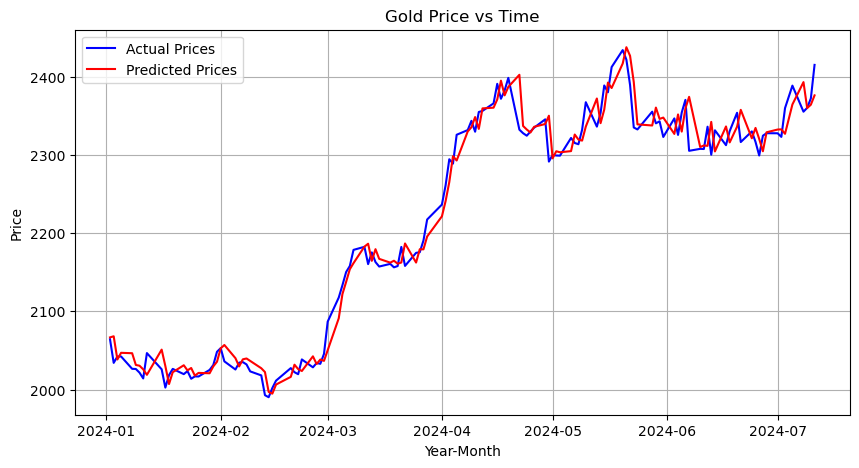

In [48]:
# Calculate wrong direction prediction count and within 10% error count only if in the right direction
wrong_direction_count = 0
within_percent_count = 0
percent = 0.001

for i in range(1, len(pred_series)):
    if (pred_series[i] > pred_series[i - 1] and prices_2024[i] < prices_2024[i - 1]) or \
       (pred_series[i] < pred_series[i - 1] and prices_2024[i] > prices_2024[i - 1]):
        wrong_direction_count += 1
    else:
        if abs((pred_series[i] - prices_2024[i]) / prices_2024[i]) <= percent:
            within_percent_count += 1

# Print the metrics
print('\n')
print(f"Right Direction Prediction Count: {len(pred_series) - wrong_direction_count}", "-->", f"Within {percent*100}% Error Count: {within_percent_count}")
print(f"Wrong Direction Prediction Count: {wrong_direction_count}")

# Plotting the prices from 2024 onwards
plt.figure(figsize=(10, 5))
plt.plot(prices_2024, color='blue', label='Actual Prices')
plt.plot(pred_series, color='red', label='Predicted Prices')
plt.legend()
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Gold Price vs Time')
plt.grid(True)
plt.show()
